In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from "derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr"
data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')

Extracting parameters from C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr...
Setting channel info structure...


C:\Users\ernes\AppData\Local\Temp\ipykernel_29204\1065157058.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')
C:\Users\ernes\AppData\Local\Temp\ipykernel_29204\1065157058.py:7: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')


In [2]:
%matplotlib tk
data.plot()
data.info

Using qt as 2D backend.
Opening raw-browser...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2015-08-14 14:25:22 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [3]:
data_filt=data.copy().load_data().filter(0.1,30)
data_filt.plot()
data_filt.info

Reading 0 ... 67387  =      0.000 ...   336.935 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 sec)

Opening raw-browser...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2015-08-14 14:25:22 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [4]:
for i in [20,22,24,26,34,40,42,48]:
    print(data.ch_names[i])
#names of the reference channels of the EEG used by the authors

FC1
CP1
FC5
CP5
C1
FC3
CP3
C5


In [5]:
events=mne.events_from_annotations(data_filt) #extract the events from the data
events 

Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  1', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


(array([[    0,     0, 99999],
        [ 2230,     0,  1128],
        [ 2249,     0, 10001],
        ...,
        [67030,     0,  1128],
        [67075,     0, 10001],
        [67227,     0, 10001]]),
 {'New Segment/': 99999,
  'Pulse Artifact/R': 10001,
  'Response/R128': 1128,
  'Stimulus/S  1': 1,
  'Stimulus/S 99': 99,
  'TPULSE/TEND': 10002,
  'TPULSE/TPEAK': 10003,
  'TPULSE/TSTART': 10004})

In [ ]:
events[0][events[0][:,2]==1] # object de epochs pel bloc de tasca i fer el mateix amb el rest, per obtenir els temps

In [66]:
task=events[0][events[0][:,2]==1] #task
task_time=task[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
task_time

array([[ 31.26 ],
       [ 71.33 ],
       [111.4  ],
       [151.45 ],
       [191.485],
       [231.54 ],
       [271.59 ],
       [311.62 ]])

In [67]:
rest=events[0][events[0][:,2]==99] #rest
rest_time=rest[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
rest_time

array([[ 51.3  ],
       [ 91.365],
       [131.435],
       [171.47 ],
       [211.505],
       [251.555],
       [291.605]])

In [116]:
time=np.concatenate((task_time,rest_time))
time=np.squeeze(time)
time=np.sort(time)
time

array([ 31.26 ,  51.3  ,  71.33 ,  91.365, 111.4  , 131.435, 151.45 ,
       171.47 , 191.485, 211.505, 231.54 , 251.555, 271.59 , 291.605,
       311.62 ])

In [121]:
for j in range(len(time)-1):
    epochs= mne.make_fixed_length_epochs(data_filt.copy().crop(tmin=time[j], tmax=time[j+1]))

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found


In [122]:
#Create a new channel called stimulation (STI) needed to add the events
stim=mne.create_info(['STI'],200,['stim'])
stim_raw=mne.io.RawArray(np.zeros([1,67388]),stim)
data_filt.load_data().add_channels([stim_raw],force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=67388
    Range : 0 ... 67387 =      0.000 ...   336.935 secs
Ready.


<RawBrainVision | sub-xp101_task-motorloc_eeg_pp.dat, 65 x 67388 (336.9 s), ~33.5 MB, data loaded>

In [123]:
data_filt.ch_names #see the STI channel at the end

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'ECG',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'FT9',
 'FT10',
 'Fpz',
 'CPz',
 'STI']

In [124]:
data_filt.add_events(events[0],stim_channel='STI',replace=True) #add the events to the data

In [125]:
event_id = {'task':1,'rest':99} #take the value of the 'Stimulus/S 10001': 10001
tmin = 2  # start of each epoch (200ms before the trigger)
tmax = 18  # end of each epoch (500ms after the trigger) 
# data_filt.info['bads'] = ['ECG'] # ECG is a bad channel
baseline = (2, 3) 

In [126]:
reject_criteria = dict(eeg=600e-5)      
picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
                       include=[])
# picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
#                        include=[], exclude='bads')
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [127]:
epochs.load_data().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).plot()

Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Opening epochs-browser...


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


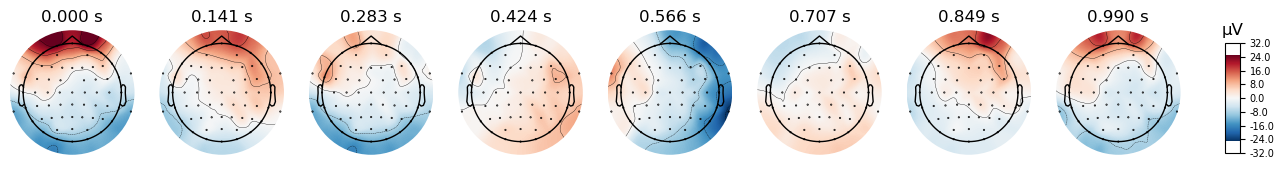

In [129]:
evoked = epochs.set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).average() #mean of the epochs to get the evoked response
evoked.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')